In [27]:
import numpy as np
import pandas as pd
from scipy.stats import binom
from scipy.optimize import minimize
import matplotlib.pyplot as plt

# 9.23

## Population mean

$\textbf{E}(X) = \sum_S x f(x) $ 

if $X$ ~ $\text{Binomial}(K, p)$

it turns out $\textbf{E}(X) = K p $ 

#### example
$X$ ~ $\text{Binomial}(K = 10, p = .5)$ we expect 5 heads. $\textbf{E}(X) = 10 * .5 = 5$

#### example
$X$ ~ $\text{Binomial}(K = 11, p = .5)$ we expect 5.5 heads. $\textbf{E}(X) = 11 * .5 = 5.5$. Population means do not need to be values in the support of the RV itself.

#### example
$X$ ~ $\text{uniform}(a, b) \rightarrow \textbf{E}(x) = \frac{b + a}{2}$

## Likelihood Method

$L(\theta | x) = \prod_{n = 1}^{N} f(x_n | \theta)$

$\theta$ - populations parameter(s)

$L$ - liklihood function

$f(x)$ - probability density function

$x_n$ - the observed RV in the array 

$x$ - the array of observed data

#### Goal: What is the most likely value of \theta, given the observed data x
$\hat{\theta}$ = argmax$[L(\theta | x)]$ Call $\hat\theta$ the maximum likelihood estimator

#### example
$X_1, X_2, ... X_N $ ~ Binomial$(K, p)$

$L(p | x, K) = \prod_{n = 1}^N$  $K\choose{  n}$ $p^{x_n}(1-p)^{K - x_n}$

    0) Take natural log (makes it easier for computer)
    1) Take derivative with respect to p and simplify
    2) Set derivative equal to 0
    3) solve for p
    
board math $\rightarrow \hat p = \frac{\sum x_n}{K N}$

# 9.25

music recomendation: kokoroko

$X_1, ..., X_N$ ~ Binomial$(K, p)$

$L(p|\underline X, k)$ Given the data what is the most likley value of pop paramater p. 

$L(p|\underline X, k) = \prod_{n = 1}^ N f(X_N|p)$

We want the "maximum likliyhood estimator", $\hat p = \text{argmax}_p L(p|\underline X, k)$

for simplicity take natural log. he calls it ln

$ln(L(p|\underline{X}, k))\\ 
= \sum_{n = 1} ^ N ln f(x_n | p)\\ 
= \sum_{n = 1} ^ N ln({k \choose N} p^{x_n} * (1-p)^{k-x_n})\\ =\sum_{n = 1} ^ N ln({k \choose N}) + ln( p^{x_n}) + ln( (1-p)^{k-x_n}) \\
= \sum_{n = 1} ^ N ln({k \choose N}) + x_n ln( p) + (k-x_n) ln (1-p)\\ 
\propto _p \sum_{n = 1} ^ N x_n ln( p) + *(k-x_n) ln (1-p) $

Lets write this simplified log-likelihood function in python

def(LL_binomial(p, X, k)):

#### Why is it a product example:
Bernoulli = H, T, H

p of this outcome = p * (1-p) * p

p came from the probability density function, so this is really $f(1) * f(0) * f(1) = f(x_1) * ... = \prod_{n = 1} ^N f(x_n) $

now take $\frac{d}{dp}\sum_{n = 1} ^ N x_n ln( p) + (k-x_n) ln (1-p)  \\ = \sum_{n = 1} ^ N \frac{p}{ x_n} - \frac{k-x_n} {1-p}   $ 

so,

$\sum_{n = 1} ^ N \frac{p}{ x_n} = \sum_{n = 1} ^ N \frac{k-x_n} {1-p}$


$\sum_{n = 1} ^ N x_n - p \sum_{n = 1} ^ N x_n   = p * K * k - p \sum_{n = 1} ^ N x_n$


$\sum_{n = 1} ^ N x_n    = p * K * k $

This gives $\hat p$, maximum likliyhood estimator

$\hat p  = \frac{\sum_{n = 1} ^ N x_n}{N * k}$

This is intutitive. $\textbf{E}(X) = k * p$ and the sample mean is $\frac{\sum_{n = 1} ^ N x_n}{N}$ so $\hat p $ is the mean over k, the piece you don't want


In [29]:
def ll_binomial(p, X, K):
    N = X.size
    Sx = np.sum(X)
    return -1 * np.log(p) * Sx - (N * K - Sx) * np.log(1 - p)

In [30]:
N = 1001
K = 12
X = np.random.binomial(K, 0.6, size = N)

In [31]:
#minimize(function, tuple of best guess, 
#arguements, method (always use this), bounds) 
#this is in hw 10

minimize(ll_binomial, (0.5), args = (X, K), 
         method = "L-BFGS-B", bounds = [(1e-5, 1 - 1e-5)])

      fun: array([8062.74711211])
 hess_inv: <1x1 LbfgsInvHessProduct with dtype=float64>
      jac: array([-9.09494702e-05])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 14
      nit: 5
   status: 0
  success: True
        x: array([0.60431235])

# 9.26
### Why math on a computer is hard

in yesterday's example, we needed soft bounds else ln(0) is undefined and its bad!!

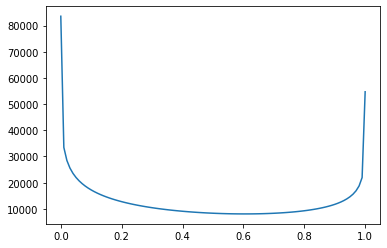

In [33]:
p = np.linspace(1e-5, 1-1e-5, 101)
p
plt.plot(p, ll_binomial(p, X, K))

### Gamma Random Variable
This is like homework 11

$f(x|\alpha, \beta) = (\beta^\alpha \Gamma(\alpha))^{-1} x^{\alpha - 1} e^{\frac{-x} {\beta}}$ for $\alpha > 0, \beta > 0, x > 0$

$\Gamma$ function is the generilization of factorial to non ints. if $\alpha$ is an int,

$\Gamma(\alpha) = (\alpha - 1)!$

but really,

$\Gamma(\alpha) = \int_0 ^\infty x^{\alpha - 1} e ^ x dx$

Lets make a lileleyhood function
$L(\alpha, \beta |\underline{x}) = \prod_{n=1}^N f(x_n|\alpha, \beta)$

0) take log

$\sum log(f(x_n|\alpha,\beta))$

$\sum [-\alpha log(\beta) - log(\Gamma(\alpha)) + (\alpha - 1) log(x_n) - \frac{x_n}{\beta}]$

Screw this! Python does the derivitaves!

In [37]:
from scipy.special import loggamma
def ll_gamma(theta, X):
    alpha = theta[0]
    beta = theta[1]
    Sx = np.sum(X)
    N = X.size
    return N * alpha * np.log(beta) + N * loggamma(alpha) -\
    (alpha - 1 ) * np.sum(np.log(X)) + Sx / beta

In [60]:
N = 1001
a = 1.24
b = 12.43
X = np.random.gamma(a,b,size = N)

In [61]:
minimize(ll_gamma, (1,1), args = (X), 
         method = "L-BFGS-B", bounds = [(1e-5, np.inf), (1 - 1e-5, np.inf)])

      fun: 3699.2332225827786
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([-9.09494702e-05, -9.09494702e-05])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 60
      nit: 19
   status: 0
  success: True
        x: array([ 1.22090188, 12.27675704])